# PHYS 64 Project Figures Notebook
### Lev Gruber

This notebook creates plots and circuit diagrams using saved data from hh-distance, nh3_local, and nh3_cloud.

Table of contents:
1. Plotting local NH3 results
2. Plotting cloud simulated NH3 results
3. Plotting quantum computed NH3 results
4. Plotting 1,2,3 together for comparison
5. Plotting local HH results
6. Circuit comparison of HH vs NH3

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

#### Plotting local results

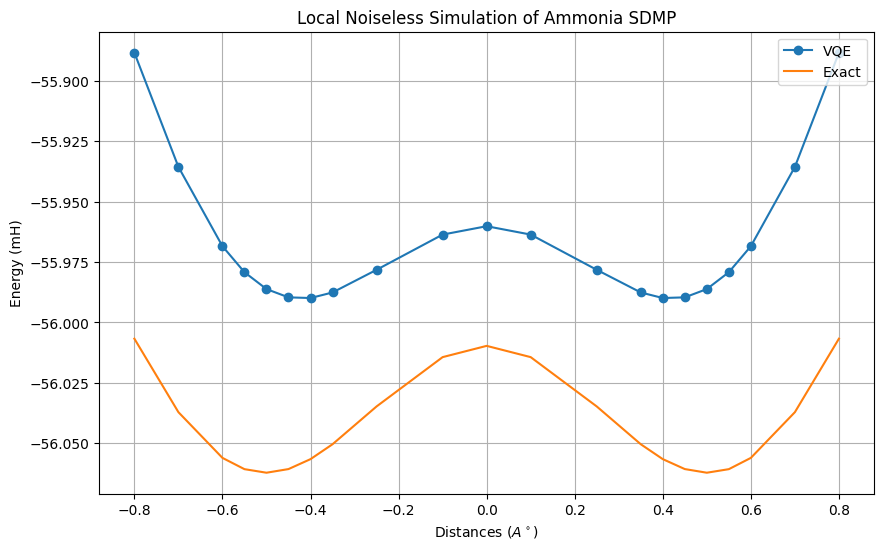

In [2]:
# Read the csv file
df_loc = pd.read_csv('local_nh3_4272024.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_loc['Distances'], df_loc['VQE Energies'], marker='o', label='VQE')
plt.plot(df_loc['Distances'], df_loc['Exact Energies'],label='Exact')
plt.title('Local Noiseless Simulation of Ammonia SDMP')
plt.xlabel(r'Distances ($A^\circ$)')
plt.ylabel('Energy (mH)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

#### Plotting cloud simulated results

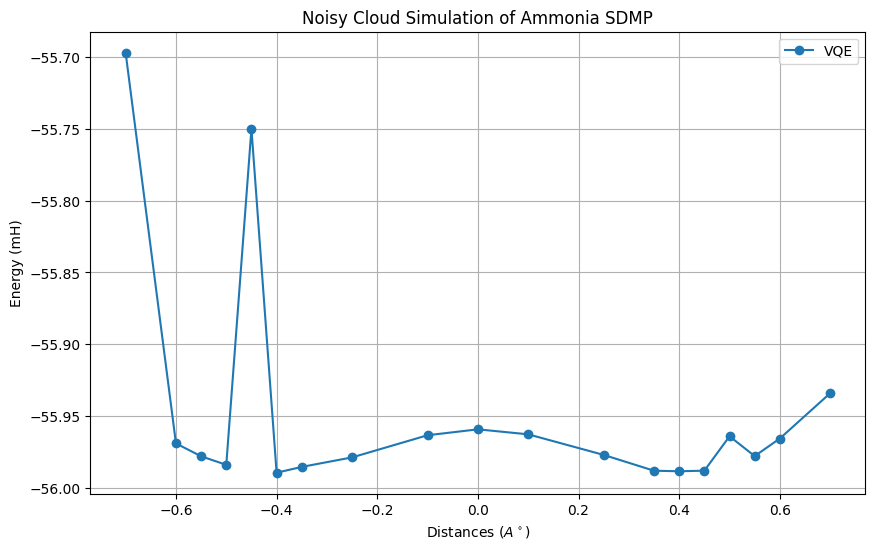

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file
df_no = pd.read_csv('ibm_noisy_sim_energies_4252024.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_no['Distances'], df_no['VQE Energies'], marker='o', label = 'VQE')
plt.title('Noisy Cloud Simulation of Ammonia SDMP')
plt.xlabel(r'Distances ($A^\circ$)')
plt.ylabel('Energy (mH)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

#### Plotting quantum computed results

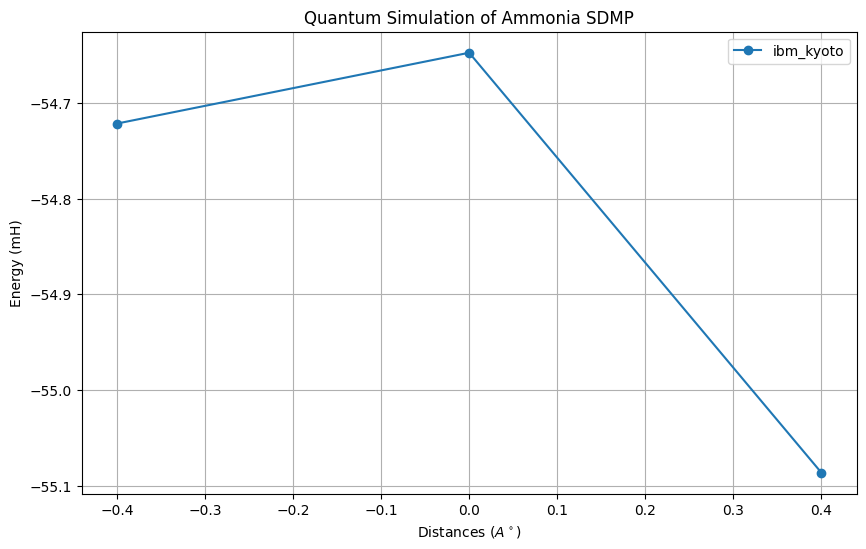

In [4]:
# Read the csv file
df_qu = pd.read_csv('ibm_kyoto_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_qu['Distances'], df_qu['VQE Energies'], marker='o', label = 'ibm_kyoto')
plt.title('Quantum Simulation of Ammonia SDMP')
plt.xlabel(r'Distances ($A^\circ$)')
plt.ylabel('Energy (mH)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

#### Plotting together with and without quantum data

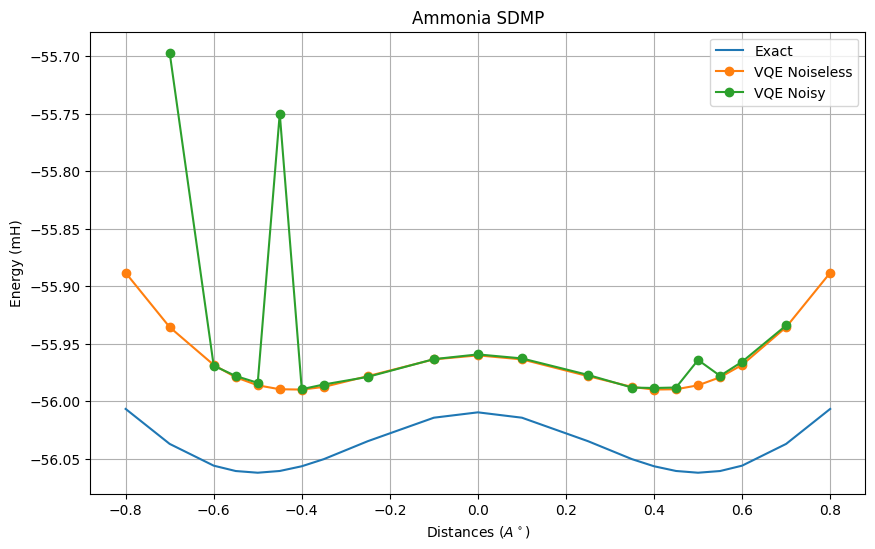

In [5]:
# Plotting noisy results, exact energy, and noiseless results for comparison.

plt.figure(figsize=(10, 6))

plt.plot(df_loc['Distances'], df_loc['Exact Energies'],label='Exact')
plt.plot(df_loc['Distances'], df_loc['VQE Energies'], marker='o', label='VQE Noiseless')
plt.plot(df_no['Distances'], df_no['VQE Energies'], marker='o', label = 'VQE Noisy')
plt.title('Ammonia SDMP')
plt.xlabel(r'Distances ($A^\circ$)')
plt.ylabel('Energy (mH)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

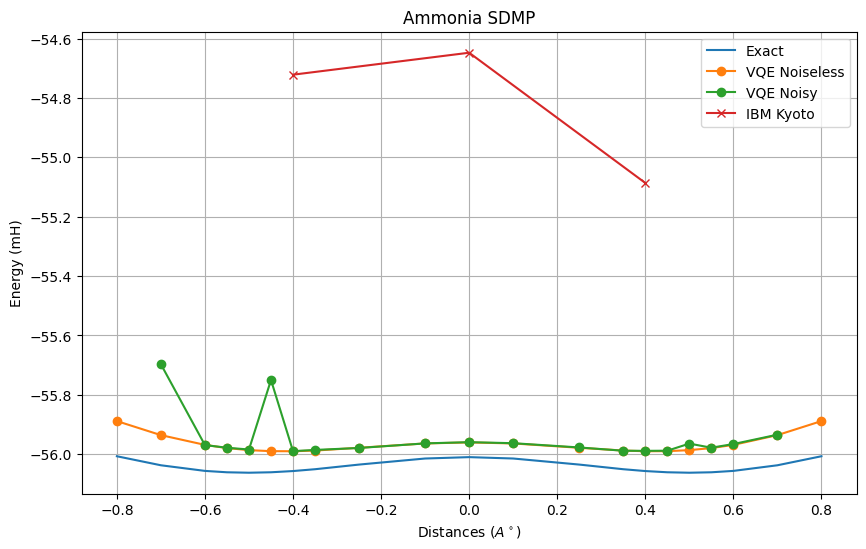

In [6]:
# Plotting all results for comparison 
plt.figure(figsize=(10, 6))

plt.plot(df_loc['Distances'], df_loc['Exact Energies'],label='Exact')
plt.plot(df_loc['Distances'], df_loc['VQE Energies'], marker='o', label='VQE Noiseless')
plt.plot(df_no['Distances'], df_no['VQE Energies'], marker='o', label = 'VQE Noisy')
plt.plot(df_qu['Distances'], df_qu['VQE Energies'], marker='x', label = 'IBM Kyoto')
plt.title('Ammonia SDMP')
plt.xlabel(r'Distances ($A^\circ$)')
plt.ylabel('Energy (mH)')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

#### Plotting H-H distance relation:

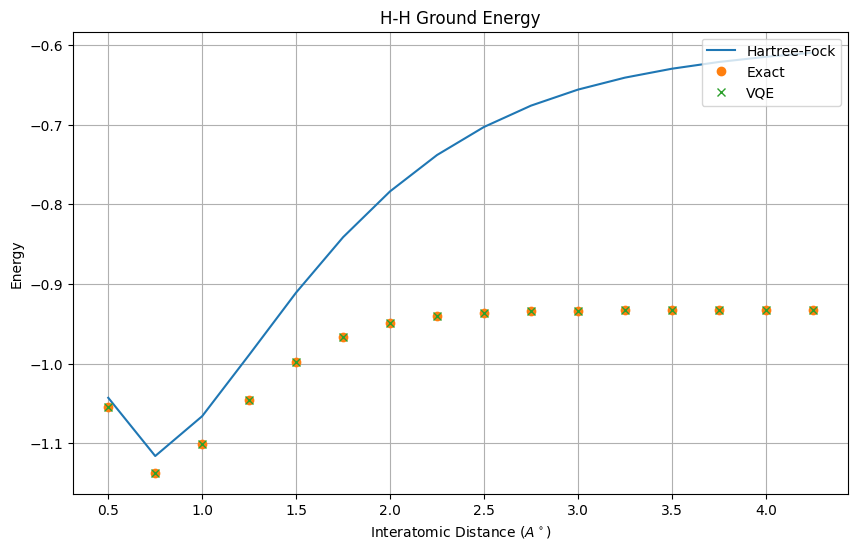

In [7]:
df_hh = pd.read_csv('hh_local_4282024.csv')

plt.figure(figsize=(10, 6))

plt.plot(df_hh['Distances'], df_hh['HF Energies'], label = 'Hartree-Fock')
plt.plot(df_hh['Distances'], df_hh['Exact Energies'], 'o', label = 'Exact')
plt.plot(df_hh['Distances'], df_hh['VQE Energies'], 'x', label = 'VQE')

plt.xlabel(r'Interatomic Distance ($A^\circ$)')
plt.ylabel('Energy')
plt.title('H-H Ground Energy')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

#### Comparing circuit complexity of HH and NH3, has separate imports than above to make pure figure creation more lightweight.

First we draw the HH circuit then the NH3 circuit. If we consider just the ansatz (not what it is then mapped to in the NH3 case), we find identaical circuit diagrams--this is because the CAS transformation on the NH3 reduces the number of spatial orbitals and particles being considered to the same number as H2 (2, (1,1)).

View also that the actual circuit for the kyoto nh3 is extremely long and fairly complex, hence the long run times.

In [8]:
# imports

# HH and NH3
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

# NH3 only
# CAS packages
from qiskit_nature.second_q.transformers import ActiveSpaceTransformer
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitMapper

# Cloud usage packages
import qiskit_ibm_runtime
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV1 as Estimator
from qiskit_ibm_provider import IBMProvider


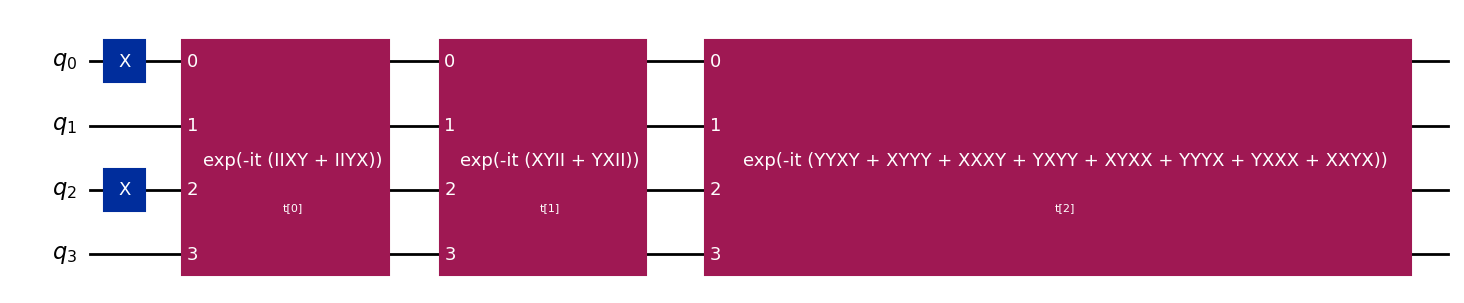

In [9]:


# set up H-H for VQE
driver = PySCFDriver(
atom = 'H .0 .0 -0.1; H .0 .0 0.1',
unit=DistanceUnit.ANGSTROM,
basis='sto3g' #figure out what this is
    # atom='O 0.0 0.0 0.0; H 0.757 0.586 0.0; H -0.757 0.586 0.0',
    #unit=DistanceUnit.ANGSTROM, charge=0, spin=0, basis='sto3g' <- H2O
)

problem = driver.run()

# set up mapper and VQE
mapper = JordanWignerMapper() #num_particles=problem.num_particles if using parity

# define ansatz
ansatz = UCCSD(
    problem.num_spatial_orbitals,
    problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        problem.num_spatial_orbitals,
        problem.num_particles,
        mapper
    )
)
ansatz.decompose().draw("mpl")

ibm_kyoto


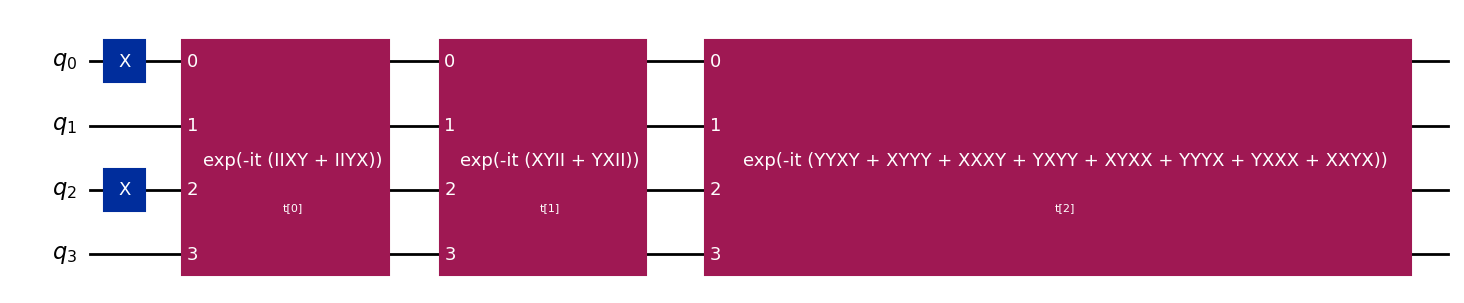

global phase: π/2
                                                                            »
    ancilla_0 -> 0 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_1 -> 1 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_2 -> 2 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_3 -> 3 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_4 -> 4 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_5 -> 5 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_6 -> 6 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_7 -> 7 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_8 -> 8 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_9 -> 9 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_10 -> 10 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_11 -> 11 ─────────────────────────────────────────────────────────»
                   ┌─────────┐ ┌────┐               ┌──────┐  ┌──────────┐  »
         q_1 -> 12 ┤ Rz(π/2) ├─┤ √X ├───────────────┤0     ├──┤ Rz(-π/2) ├──»
                   ├─────────┴┐├────┤  ┌──────────┐ │  Ecr │┌─┴──────────┴─┐»
         q_0 -> 13 ┤ Rz(-π/2) ├┤ √X ├──┤ Rz(-π/2) ├─┤1     ├┤ Rz(1.0*t[0]) ├»
                   └──────────┘└────┘  └──────────┘ └──────┘└──────────────┘»
  ancilla_12 -> 14 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_13 -> 15 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_14 -> 16 ─────────────────────────────────────────────────────────»
                                                                            »
         q_2 -> 17 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_15 -> 18 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_16 -> 19 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_17 -> 20 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_18 -> 21 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_19 -> 22 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_20 -> 23 ─────────────────────────────────────────────────────────»
                                                                            »
  ancilla_21 -> 24 ─────────────────────────────────────────────────────────»
                                                                            »
  an

In [10]:
service = QiskitRuntimeService(channel="ibm_quantum") #, token = 'INSERT API TOKEN'
backend = service.get_backend("ibm_kyoto")
#backend = service.least_busy(operational=True, simulator=True)
print(backend.name)
with Session(service=service, backend=backend) as session:
    # Use PySCF to compute 'one-body and two-body integrals in electronic orbital basis'.. or more simply build the particle
    driver = PySCFDriver(
        atom = 'N 0.0 0.0 0.0; H -0.8121 -0.4689 0.0; H 0.8121 -0.4689 0.0; H 0.0 0.9377 0.0' , 
        unit=DistanceUnit.ANGSTROM,         # define the above distances to be in terms of Angstroms (meaning for ex. .5 on N is 5*10^-11 m)
        basis='sto6g' 
    )

    problem = driver.run()
    
    # define 2e 2o transformer and use it to redefine problem w/ CAS(2o, 2e)
    transformer = ActiveSpaceTransformer(2, 2)
    as_problem = transformer.transform(problem)
    
    mapper = JordanWignerMapper()

    # Convert the problem to a qubit operator
    qubit_op = mapper.map(as_problem.second_q_ops()[0])
    num_qubits = qubit_op.num_qubits

    # setup VQE using Hartree-Fock as ansatz
    ansatz = UCCSD(
        as_problem.num_spatial_orbitals,
        as_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            as_problem.num_spatial_orbitals,
            as_problem.num_particles,
            mapper
        )
    )
    
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
    isa_circuit = pm.run(ansatz)
    session.close()
display(ansatz.decompose().draw(output="mpl"))
isa_circuit.draw(output="text")